In [2]:
#suppress deprecation warnings  
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import hddm 
import numpy as np 
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
!pwd
write_dir = 'Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/'
print(write_dir)
load_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/'
print(load_dir)
model_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

fname = 'combined_learning_sig_obs_data.csv'

/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs
Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/fit_param_suite/
/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/


In [4]:
data = pd.read_csv(load_dir+fname)
data.columns

Index(['Unnamed: 0', 'cpp', 'B', 'cp', 'gen_drift', 'gen_bound', 'choice',
       'accuracy', 'solution', 'reward', 'cumulative_reward', 'rt',
       'total_trial_time', 'iti', 'cp_with_slow_fast', 'obs_cp_with_slow_fast',
       'high_val_cue', 'ID', 'condition'],
      dtype='object')

In [5]:
data = data[['accuracy', 'rt', 'condition', 'ID', 'B', 'cpp']] 
data = data.rename(index=str, columns={"accuracy": "response", "ID": "subj_idx", "condition": "stim"})
data.columns = data.columns.str.strip()
data['stim'] = data['stim'].str.strip()
data.head()

,response,rt,stim,subj_idx,B,cpp
0,0.0,0.711570,hc,761,0.000000,0.021840
1,0.0,0.681410,hc,761,0.000000,0.019044
2,1.0,0.767118,hc,761,-0.032760,0.018022
3,0.0,0.507209,hc,761,0.007296,0.017503
4,1.0,0.656259,hc,761,0.039621,0.017197


In [7]:
data.B[0:600]

0      0.000000
1      0.000000
2     -0.032760
3      0.007296
4      0.039621
5      0.068441
6      0.095239
7     -0.906163
8      0.249100
9     -2.769021
10     0.560045
11    -1.534248
12     0.189922
13     0.791505
14     1.013852
15     1.129026
16     1.199783
17     2.962542
18     3.685560
19     3.169655
20     3.505178
21     3.030637
22     2.225698
23     2.352700
24     0.685912
25    -2.356957
26     0.466194
27     1.066133
28     1.233266
29     1.311910
         ...   
570    0.200262
571    0.478493
572   -0.227967
573   -1.038440
574   -2.363671
575   -2.410195
576    0.419782
577   -2.081883
578    0.243349
579    0.963488
580   -0.946340
581    0.578831
582    0.955850
583    1.117324
584    1.207037
585    0.811155
586    1.238185
587    4.704682
588    5.371022
589    0.168850
590   -0.926790
591   -1.548815
592   -1.834304
593   -0.801749
594   -0.042784
595   -0.874133
596   -0.139671
597    0.220520
598    0.421050
599   -2.653693
Name: B, Length: 600, dt

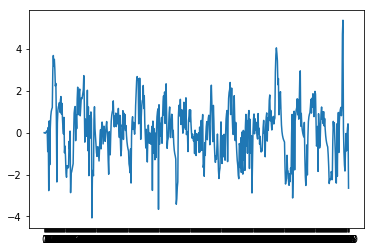

In [8]:

plt.plot(data.B[0:600])
plt.show()

## Load winning model from stepwise selection process 

In [8]:
# av_within_subj_obs_reg = hddm.load(model_dir+'av_within_subj_observed_cleaned_reg')

FileNotFoundError: [Errno 2] No such file or directory: '/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/av_within_subj_observed_cleaned_reg'

### Extract coefficients 

In [6]:
v0 = av_within_subj_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc = av_within_subj_obs_reg.nodes_db.ix[['v_B:C(stim)[hc]'], 'mean'][0]
v_beta_lc = av_within_subj_obs_reg.nodes_db.ix[['v_B:C(stim)[lc]'], 'mean'][0]
v_beta_hv = av_within_subj_obs_reg.nodes_db.ix[['v_B:C(stim)[hv]'], 'mean'][0]
v_beta_lv = av_within_subj_obs_reg.nodes_db.ix[['v_B:C(stim)[lv]'], 'mean'][0]

v_pred = np.hstack((v_beta_hc, v_beta_lc, v_beta_hv, v_beta_lv))

In [7]:
t = av_within_subj_obs_reg.nodes_db.ix[['t'], 'mean'][0]

a0 = av_within_subj_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]
a_beta_hc = av_within_subj_obs_reg.nodes_db.ix[['a_cpp:C(stim)[hc]'], 'mean'][0]
a_beta_lc = av_within_subj_obs_reg.nodes_db.ix[['a_cpp:C(stim)[lc]'], 'mean'][0]
a_beta_hv = av_within_subj_obs_reg.nodes_db.ix[['a_cpp:C(stim)[hv]'], 'mean'][0]
a_beta_lv = av_within_subj_obs_reg.nodes_db.ix[['a_cpp:C(stim)[lv]'], 'mean'][0]

a_pred = np.hstack((a_beta_hc, a_beta_lc, a_beta_hv, a_beta_lv))

### Calculate continuous estimate of drift and threshold


In [8]:
v_hc_trials = v0 + v_beta_hc * data[data.stim=='hc']['B'] 
v_lc_trials = v0 + v_beta_lc * data[data.stim=='lc']['B'] 
v_hv_trials = v0 + v_beta_hc * data[data.stim=='hv']['B'] 
v_lv_trials = v0 + v_beta_lc * data[data.stim=='lv']['B'] 

In [9]:
a_hc_trials = a0 + a_beta_hc * data[data.stim=='hc']['cpp'] 
a_lc_trials = a0 + a_beta_lc * data[data.stim=='lc']['cpp'] 
a_hv_trials = a0 + a_beta_hc * data[data.stim=='hv']['cpp'] 
a_lv_trials = a0 + a_beta_lc * data[data.stim=='lv']['cpp'] 

In [ ]:
plt.plot(v_hc_trials)
plt.show()

In [ ]:
 %matplotlib inline
plt.plot(v_hc_trials)

### plot cpp, B, estimated threshold surface for each condition 

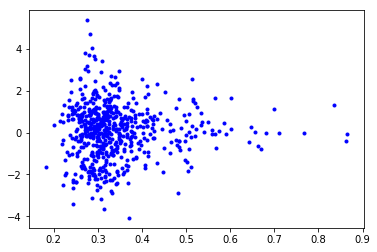

In [32]:
%matplotlib inline
plt.scatter(data[(data.stim=='hc') & (data.subj_idx == 761)].rt, 
            data[(data.stim=='hc') & (data.subj_idx == 761)].B,
            
           c='blue', marker='.')
plt.show()

In [15]:
data.columns

Index(['response', 'rt', 'stim', 'subj_idx', 'B', 'cpp'], dtype='object')

<IPython.core.display.Javascript object>


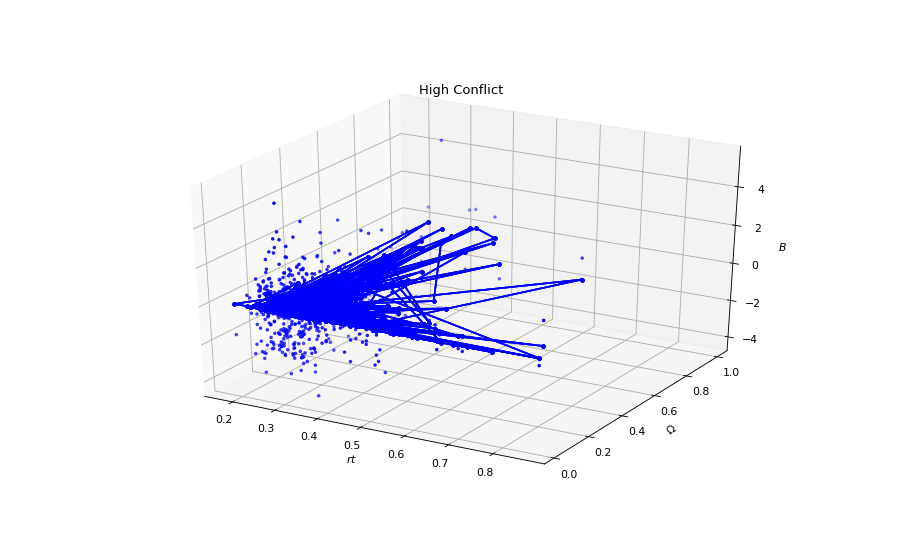

In [16]:
%matplotlib notebook  
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# pd.set_option('html',False)
pd.set_option('max_columns',30)
pd.set_option('max_rows',10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(data[(data.stim=='hc') & (data.subj_idx == 761)].rt, data[(data.stim=='hc') & (data.subj_idx == 761)].cpp, data[(data.stim=='hc') & (data.subj_idx == 761)].B,
           c='blue', marker='.')
# 


# ax.set_xlabel('$\hat{a}$')
ax.set_xlabel('$rt$')

ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('High Conflict')

plt.show()

In [ ]:
%matplotlib notebook  
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# pd.set_option('html',False)
pd.set_option('max_columns',30)
pd.set_option('max_rows',10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter(a_hc_trials, data[data.stim=='hc']['cpp'], data[data.stim=='hc']['B'],
           c='blue', marker=m)
# 


ax.set_xlabel('$\hat{a}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('High Conflict')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a_lc_trials, data[data.stim=='lc']['cpp'], data[data.stim=='lc']['B'],
           c='purple', marker=m)

ax.set_xlabel('$\hat{a}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('Low Conflict')
ax.set_xlim([.98,1.01])

plt.show()

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a_lv_trials, data[data.stim=='lv']['cpp'], data[data.stim=='lv']['B'],
           c='forestgreen', marker=m)

ax.set_xlabel('$\hat{a}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('Low Volatility')
ax.set_xlim([.98,1.01])

plt.show()

In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(a_hv_trials, data[data.stim=='hv']['cpp'], data[data.stim=='hv']['B'],
           c='red', marker=m)

ax.set_xlabel('$\hat{a}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('High Volatility')
ax.set_xlim([.98,1.01])

plt.show()

### plot cpp, B, estimated drift surface for each condition 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(v_hc_trials, data[data.stim=='hc']['cpp'], data[data.stim=='hc']['B'],
           c='blue', marker=m)

ax.set_xlabel('$\hat{v}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('High Conflict')
ax.set_xlim([.1,.8])

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(v_lc_trials, data[data.stim=='lc']['cpp'], data[data.stim=='lc']['B'],
           c='purple', marker=m)

ax.set_xlabel('$\hat{v}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('Low Conflict')
ax.set_xlim([.1,.8])

plt.show()

In [ ]:
%matplotlib inline
plt.plot(data[data.stim=='hv']['B'],v_hv_trials, '.')
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(v_lv_trials, data[data.stim=='lv']['cpp'], data[data.stim=='lv']['B'],
           c='forestgreen', marker=m)

ax.set_xlabel('$\hat{v}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('Low Volatility')
ax.set_xlim([.1,.8])

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(v_hv_trials, data[data.stim=='hv']['cpp'], data[data.stim=='hv']['B'],
           c='red', marker=m)

ax.set_xlabel('$\hat{v}$')
ax.set_ylabel('$\Omega$')
ax.set_zlabel('$B$')
ax.set_title('High Volatility')
ax.set_xlim([.1,.8])

plt.show()

In [ ]:
# Libraries
from scipy.stats import kde

 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
axes[0].plot(x,y, '.')
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(a_hc_trials, data[data.stim=='hc']['B'], gridsize=nbins, cmap=plt.cm.BuGn_r)

axes[2].set_title('2D Histogram')
axes[2].hist2d(a_hc_trials, data[data.stim=='hc']['B'], bins=nbins, cmap=plt.cm.BuGn_r)